In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [4]:
lr_df = pd.read_csv('hotel_review_data_cleaned.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(lr_df['reviews'], lr_df['sentiment'], test_size=0.2, random_state=42)

In [6]:
# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Predictions on test set
y_pred = logreg_model.predict(X_test_tfidf)

# Add predicted sentiment to the DataFrame
X_test_df = pd.DataFrame(X_test)  # Convert X_test back to a DataFrame for easy concatenation
X_test_df['predicted_sentiment'] = y_pred

# Display the DataFrame with predicted sentiment
print(X_test_df)

                                                 reviews  predicted_sentiment
11275                                   happy brief stay                    2
16051  restaurant one wife favorite north conway area...                    2
15446  happy adult area casino next visit definitely ...                    1
24688  needed one night two twonight location hampton...                    2
19074  far comfortable bed ive ever slept bathroom so...                    2
...                                                  ...                  ...
21270  well whole room clean bed comfortable fitted t...                    2
20416                             get parking spot early                    2
1966   lauren sue wonderful host sue breakfast delici...                    2
14273  old hotel room modern clean dont think include...                    2
28061  get room quiet dark enough sleep may great pla...                    2

[6928 rows x 2 columns]


In [7]:
# lr_df.to_csv('sentiment_analysis_results.csv', index=False)

In [8]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1200
           1       0.44      0.20      0.27      1134
           2       0.81      0.94      0.87      4594

    accuracy                           0.77      6928
   macro avg       0.65      0.59      0.60      6928
weighted avg       0.73      0.77      0.74      6928

Accuracy: 0.7660219399538106


# Random Search (Parameter Tuning)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [10]:
param_distributions = {
    'C': uniform(loc=0, scale=4),  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear', 'saga'],  # Solver for logistic regression
    'max_iter': randint(100, 1000)  # Maximum number of iterations
}

In [11]:
random_search = RandomizedSearchCV(LogisticRegression(solver='saga'), param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_tfidf, y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002335A792110>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002335C0E9990>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

In [12]:
print("Best Score:", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)


Best Score: 0.7608722445734566
Best Parameters: {'C': 0.6974657160199658, 'max_iter': 739, 'penalty': 'l1', 'solver': 'saga'}


In [13]:
# Evaluate the model on the test set
y_pred_random_search = random_search.best_estimator_.predict(X_test_tfidf)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_random_search))
print("Accuracy:", accuracy_score(y_test, y_pred_random_search))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      1200
           1       0.44      0.18      0.26      1134
           2       0.81      0.94      0.87      4594

    accuracy                           0.77      6928
   macro avg       0.65      0.59      0.60      6928
weighted avg       0.73      0.77      0.74      6928

Accuracy: 0.7668879907621247


In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

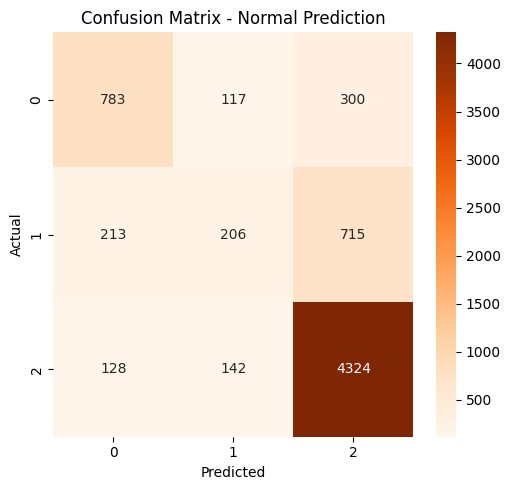

In [16]:
# Calculate confusion matrices for Normal Prediction
conf_matrix = confusion_matrix(y_test, y_pred_random_search)

# Plotting confusion matrix for Normal Prediction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=True)
plt.title("Confusion Matrix - Normal Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

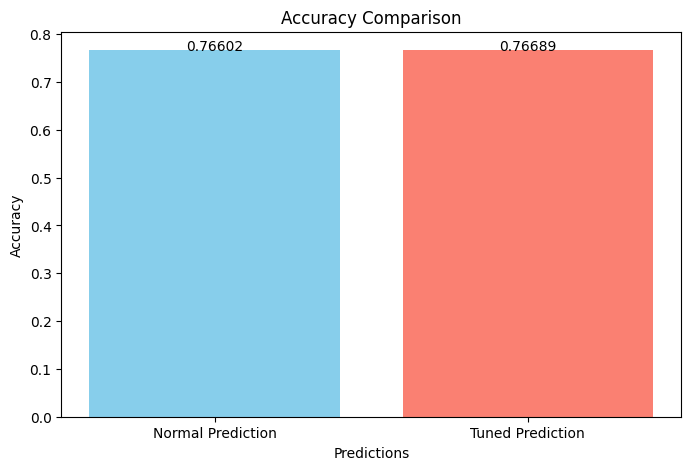

In [19]:
# Model accuracy scores
accuracy_1 = 0.7660219399538106
accuracy_2 = 0.7668879907621247

# Plotting accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(["Normal Prediction", "Tuned Prediction"], [accuracy_1, accuracy_2], color=['skyblue', 'salmon'])
plt.title("Accuracy Comparison")
plt.xlabel("Predictions")
plt.ylabel("Accuracy")

# Adding text annotation to show the difference
plt.text(0, accuracy_1 + 0.00005, "{:.5f}".format(accuracy_1), ha='center')
plt.text(1, accuracy_2 + 0.00005, "{:.5f}".format(accuracy_2), ha='center')

plt.show()